In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pickle as pk
import phate
import torch

# Visualization of latent space

In [4]:
with open('../latent_embeddingsbpti.pkl', 'rb') as file: 
    # Load the data from the pickle file
    z_rep = pk.load(file)

with open('../times_bpti.pkl', 'rb') as file: 
    # Load the data from the pickle file
    times = pk.load(file)

In [5]:
z_rep = torch.cat(z_rep, dim=0)

In [6]:
z_rep.shape

torch.Size([9985, 64])

In [7]:
# Create PHATE object
phate_operator = phate.PHATE()

# Fit and transform the latent representation
z_phate = phate_operator.fit_transform(z_rep)

# Visualize the latent representation
plt.figure(figsize=(8, 6))
plt.scatter(z_phate[:, 0], z_phate[:, 1], s=5, c=times, cmap='viridis')
plt.xlabel('PHATE 1')
plt.ylabel('PHATE 2')
plt.title('bpti Latent Representations')
plt.show()


Calculating PHATE...
  Running PHATE on 9985 observations and 64 variables.
  Calculating graph and diffusion operator...
    Calculating KNN search...
    Calculated KNN search in 0.30 seconds.
    Calculating affinities...
    Calculated affinities in 0.05 seconds.
  Calculated graph and diffusion operator in 0.36 seconds.
  Calculating landmark operator...
    Calculating SVD...


/gpfs/gibbs/project/krishnaswamy_smita/sv496/conda_envs/mfcn/lib/python3.9/site-packages/graphtools/graphs.py:290: RuntimeWarning: Detected zero distance between 10 pairs of samples. Consider removing duplicates to avoid errors in downstream processing.
  warnings.warn(


    Calculated SVD in 1.85 seconds.
    Calculating KMeans...
    Calculated KMeans in 2.38 seconds.
  Calculated landmark operator in 4.24 seconds.
Calculated PHATE in 4.61 seconds.


KeyboardInterrupt: 

Calculating TPHATE...
  Running TPHATE on 9985 observations and 64 variables.
  Landmarking not recommended; setting n_landmark to 9985
  Calculating graph and diffusion operator...
    Calculating KNN search...
    Calculated KNN search in 0.24 seconds.
    Calculating affinities...
    Calculated affinities in 0.04 seconds.
  Calculated graph and diffusion operator in 0.29 seconds.
  Learning the autocorrelation function...


/gpfs/gibbs/project/krishnaswamy_smita/sv496/conda_envs/mfcn/lib/python3.9/site-packages/tphate/graphs.py:297: RuntimeWarning: Detected zero distance between 10 pairs of samples. Consider removing duplicates to avoid errors in downstream processing.
  warnings.warn(


  Calculating Autocorr kernel...
    Dropoff point: 2
  Combining PHATE operator and autocorr operator
  Calculating optimal t...
    Automatically selected t = 40
  Calculated optimal t in 147.37 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 38.29 seconds.
  Calculating metric MDS...
  Calculated metric MDS in 1406.51 seconds.
Calculated TPHATE in 1610.99 seconds.


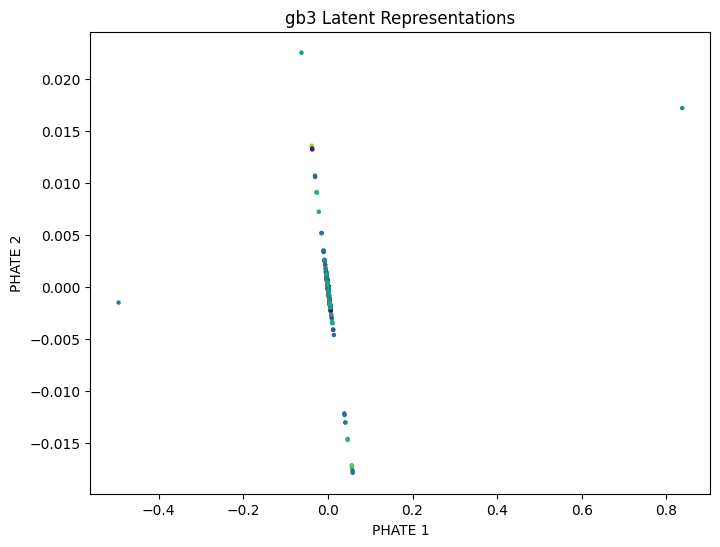

In [ ]:
import tphate

tphate_op = tphate.TPHATE(n_components=2)
data_tphate = tphate_op.fit_transform(z_rep)

plt.figure(figsize=(8, 6))
plt.scatter(data_tphate[:, 0], data_tphate[:, 1], s=5, c=times, cmap='viridis')
plt.xlabel('PHATE 1')
plt.ylabel('PHATE 2')
plt.title('gb3 Latent Representations')
plt.show()

# Coordinates Predictions

In [63]:
import pickle as pk
import phate
import torch
import numpy as np
import matplotlib.pyplot as plt
with open('coords_1ptq.pkl', 'rb') as file: 
    # Load the data from the pickle file
    coords = pk.load(file)

In [64]:
with open('1ptq_A_analysis/graphsrog.pkl', 'rb') as file:
        full_dataset =  pk.load(file)

for data in full_dataset:
        y = float(data.y)
        data.y = y
    
# import pdb; pdb.set_trace()
train_size = int(0.8 * len(full_dataset))
val_size = len(full_dataset) - train_size
train_set, val_set = torch.utils.data.random_split(full_dataset, [train_size, val_size])
test_targets = np.array([data.coords for data in val_set])

In [8]:
import os
os.chdir('..')

In [26]:
from deshaw_processing.de_shaw_Dataset import DEShaw
full_dataset = DEShaw('deshaw_processing/graphs_bpti/total_graphs.pkl')
train_size = int(0.8 * len(full_dataset))
val_size = len(full_dataset) - train_size
train_set, val_set = torch.utils.data.random_split(full_dataset, [train_size, val_size])
test_targets = np.array([data.coords for data in val_set])

/tmp/ipykernel_1437441/702165291.py:6: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  test_targets = np.array([data.coords for data in val_set])
/tmp/ipykernel_1437441/702165291.py:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  test_targets = np.array([data.coords for data in val_set])


In [65]:
test_targets

array([[[2.322221 , 1.9685787, 3.5164635],
        [2.4805913, 2.6833417, 3.6506088],
        [2.1609902, 2.46045  , 3.1243498],
        ...,
        [3.1748002, 1.4593999, 3.0837572],
        [3.0122209, 1.9543053, 3.1666944],
        [3.5681   , 1.9929997, 2.9472501]],

       [[2.5089262, 1.9950423, 3.3487473],
        [2.5883832, 2.6280081, 3.6989746],
        [2.1918502, 2.44907  , 3.1126204],
        ...,
        [2.9185998, 1.4473141, 3.3897   ],
        [3.1103263, 1.9444735, 3.2512946],
        [3.5849836, 1.7905332, 3.02985  ]],

       [[2.507063 , 2.075421 , 3.549705 ],
        [2.5042498, 2.7410915, 3.6290162],
        [2.12685  , 2.4548202, 3.0960596],
        ...,
        [3.0041568, 1.9068143, 3.285257 ],
        [3.4655473, 1.5861473, 3.0905156],
        [3.508417 , 1.9599999, 2.7415667]],

       ...,

       [[2.4946947, 2.0911365, 3.3364317],
        [2.4742336, 2.7776248, 3.5773165],
        [2.17174  , 2.4898698, 3.0580199],
        ...,
        [2.872357 , 1.4482

In [66]:
coords

[tensor([[[2.6673, 2.1611, 3.5231],
          [2.6128, 2.8564, 3.7350],
          [2.3136, 2.5278, 3.1870],
          ...,
          [2.9985, 1.5493, 3.3721],
          [3.2897, 1.7654, 3.2565],
          [3.4889, 1.7187, 3.1840]],
 
         [[2.7103, 2.2714, 3.6249],
          [2.7052, 2.9222, 3.8665],
          [2.3598, 2.6270, 3.2684],
          ...,
          [3.0785, 1.5668, 3.5194],
          [3.4063, 1.7635, 3.4296],
          [3.5736, 1.7672, 3.3699]],
 
         [[2.7456, 2.1868, 3.6164],
          [2.6499, 2.8941, 3.8087],
          [2.3391, 2.5842, 3.2454],
          ...,
          [3.0553, 1.5730, 3.4499],
          [3.3488, 1.8140, 3.3335],
          [3.5659, 1.7503, 3.2716]],
 
         ...,
 
         [[2.7629, 2.2436, 3.6809],
          [2.7442, 3.0109, 3.8917],
          [2.4147, 2.6821, 3.3389],
          ...,
          [3.1235, 1.6061, 3.5615],
          [3.4548, 1.8516, 3.4376],
          [3.6425, 1.7956, 3.3561]],
 
         [[2.7609, 2.2065, 3.6382],
          [2

In [67]:
coords = torch.cat(coords, dim=0)

In [68]:
coords.shape

torch.Size([201, 50, 3])

In [69]:
test_targets.shape

(201, 50, 3)

In [32]:
tensor_list = list(test_targets)

# Stack the tensors along a new dimension (dimension 0)
test_targets = torch.stack([t for t in tensor_list], dim=0)

In [18]:
def calculate_pearson_correlation(X, Y):
    """
    Calculate the Pearson correlation coefficient separately for each dimension (X, Y, Z) across all graphs in the test set.

    Args:
        X: numpy array of shape (N, M, D), where N is the number of graphs, M is the number of residues/nodes,
           and D is the number of dimensions containing predicted coordinates.
        Y: numpy array of shape (N, M, D), where N is the number of graphs, M is the number of residues/nodes,
           and D is the number of dimensions containing ground truth coordinates.

    Returns:
        pearson_corr: numpy array of shape (D,) containing the Pearson correlation coefficient for each dimension.
    """
    N, M, D = X.shape
    pearson_corr = np.zeros(D)

    for d in range(D):
        X_d = X[:, :, d].flatten()
        Y_d = Y[:, :, d].flatten()
        pearson_corr[d] = np.corrcoef(X_d, Y_d)[0, 1]

    return pearson_corr


In [51]:
pearson_corr = calculate_pearson_correlation(coords, test_targets)
print("Pearson Correlation Coefficient:", pearson_corr)


Pearson Correlation Coefficient: [0.98768434 0.88747316 0.94322405]


In [70]:
def eucl_dist_corrs(coords_1, 
                        coords_2, 
                        squared=False):
        """
        For two sets of coordinates, calculate the Pearson correlation 
        coefficient (PCC) between their two intra-set euclidean distances, 
        optionally squared.
        """
        from sklearn.metrics.pairwise import euclidean_distances
        from scipy.stats import spearmanr
        
        dists = [None] * 2
        for i, coords in enumerate((coords_1, coords_2)):
            dist = euclidean_distances(coords, coords)
            # exclude self-distances and duplicates (i,j-th = j,i-th distance)
            # -> create lower triangular mask excluding diagonal
            tril_mask = np.tril_indices_from(dist, k=-1)
            dist = dist[tril_mask]
            if squared:
                dist = np.square(dist)
            dists[i] = dist
        # calc the 2x2 corr matrix, and return the top off-diagonal
        pcc = np.corrcoef(dists[0], dists[1])[0, 1]
        scc = spearmanr(dists[0], dists[1])
        return pcc, scc


In [71]:
out_pcc = []
pcc_lst = []
for i in range(coords.shape[0]):
    pcc, scc = eucl_dist_corrs(coords[i], test_targets[i])
    pcc_lst.append(pcc)

out_pcc.append(np.mean(pcc_lst))
out_pcc
# pcc, scc = eucl_dist_corrs(coords, test_targets)

[0.9781921924590278]

In [18]:
tensor_list = list(test_targets)

# Stack the tensors along a new dimension (dimension 0)
test_targets = torch.stack([t for t in tensor_list], dim=0)

In [16]:
test_targets.shape

torch.Size([1997, 56, 3])

In [48]:

def est_atomic_pdb_from_residue_coords(orig_frame, 
                                       new_residue_coords,
                                       orig_residue_coords=None):
    """
    Generates a new mdtraj trajectory frame with all atoms within residues
    shifted by the differences between an original and new frame's center-of-
    residues' x, y, and z coordinates.

    This allows us to estimate atomic positions from new residue positions, and
    hence use functions/metrics designed for atom-level pdb files. HOWEVER, we
    aren't necessarily getting the true atomic coordinates this way: some residues
    are flexible, by definition we've coarsened to residue granularity, etc.
    """
    import mdtraj as md

    
    # calc differences in residue centers between preds and orig frame
    # (caution: relies on broadcasting (n_residue, 3)-shaped arrays)
    ctr_diff = new_residue_coords - orig_residue_coords
    # print(ctr_diff, '\nshape:', ctr_diff.shape)
    
    # shift orig frame atom coords by residue diffs
    pred_residue_ctr_coords = [None] * orig_frame.n_residues
    for j, residue in enumerate(orig_frame.top.residues):
        # print(f'residue {j}')
        atom_indices = [atom.index for atom in residue.atoms]
        # print(atom_indices)
        # note that orig_frame.xyz[0].shape = (n_atoms, 3)
        atom_coords = orig_frame.xyz[0][atom_indices]
        # print(atom_coords)
    
        shift_atom_coords = atom_coords + ctr_diff[j]
        # print(shift_atom_coords, '\n')
        pred_residue_ctr_coords[j] = shift_atom_coords
    pred_residue_ctr_coords = np.row_stack(pred_residue_ctr_coords)
    
    # make a copy of the orig frame and replace its atom coords
    new_frame = orig_frame.slice(0, copy=True)
    new_frame.xyz[0] = pred_residue_ctr_coords
    return new_frame

In [49]:
def get_residue_coords(frame):
    """
    Computes a numpy array of residues' xyz-coordinates from
    an mdtraj trajectory frame.
    """
    residue_ctr_coords = [None] * frame.n_residues
    for j, residue in enumerate(frame.top.residues):
        atom_indices = [atom.index for atom in residue.atoms]
        # note that frame.xyz[0].shape = (n_atoms, 3)
        atom_coords = frame.xyz[0][atom_indices] 
        mean_coords = np.mean(atom_coords, axis=0)
        residue_ctr_coords[j] = mean_coords
    residue_ctr_coords = np.row_stack(residue_ctr_coords)
    return residue_ctr_coords

In [50]:
def get_deshaw_data_info(deshaw_folderpath):
    """
    DE Shaw pdb files are in a weird folder structure
    and filenaming convention. This function walks
    through a DE Shaw data folder and generates a
    dictionary of lists holding useful file info, all
    in the order of the sorted MD simulation timesteps.
    """
    # deshaw pdb files are grouped in subfolders
    deshaw_subfolders = sorted([
        f.path for f in os.scandir(deshaw_folderpath) \
        if f.is_dir()
    ])
    n_subf = len(deshaw_subfolders)
    records = {
        'pdb_filepaths': [],
        'suffix_vals': [],
        'timestamps': []
    }
    subf_records_l = [None] * n_subf
    
    # extract info from each pdb file, by subfolder
    for j, deshaw_subf in enumerate(deshaw_subfolders):
        subf_files = os.listdir(deshaw_subf)
        n = len(subf_files)
        subf_records = {
            'pdb_filepaths': [None] * n,
            'suffix_vals': [None] * n,
            'timestamps': [None] * n
        }
        
        for i, pdb_filename in enumerate(subf_files):
            a, b = pdb_filename.split('_')
            a, val = b.split('-')
            suffix_val = val.split('.')[0]
            # int(suffix_val) is 0-2 microseconds
            t = (int(a) * 1e4 + int(suffix_val)) / 1e4
            # print(t)
            subf_records['pdb_filepaths'][i] = f'{deshaw_subf}/{pdb_filename}'
            subf_records['suffix_vals'][i] = suffix_val
            subf_records['timestamps'][i] = t
        
        # sort subfolder info lists in timestamp order
        for k, v in subf_records.items():
            subf_records[k] = [
                x for (_, x) \
                in sorted(zip(
                    subf_records['timestamps'], 
                    subf_records[k]
                ))
            ]
        subf_records_l[j] = subf_records
    
    # create master records dict (all in sorted timestamp order)
    for k in records.keys():
        for sr in subf_records_l:
            records[k].extend(sr[k])
    return records

In [72]:
# import mdtraj on first call
import mdtraj as md

# batch_rmsds = [None] * batch_size
# batch_sasas = [None] * batch_size
# batch_rgs = [None] * batch_size
# batch_dopes = [None] * batch_size
# deshaw_records = get_deshaw_data_info("/gpfs/gibbs/pi/krishnaswamy_smita/de_shaw/BPTI")

# traj = md.load(deshaw_records['pdb_filepaths'])
traj = md.load('1ptq_A_analysis/1ptq_A_R1.xtc', top='1ptq_A_analysis/1ptq_A.pdb')
rmsd_list = []
for i in range(coords.shape[0]):
    # grab on sample's coords from batch of samples
    # res_coords = batch_residue_coords[i, :, :].numpy()
    # timestep_id = timestep_ids[i]
    
    # ref_frame = self.ref_trajectory[timestep_id]
    ref_frame =  traj[i]
    ref_frame_residue_coords = get_residue_coords(ref_frame)
    # print(coords[i].shape)
    # print(ref_frame_residue_coords.shape)
    atomic_frame = est_atomic_pdb_from_residue_coords(
        orig_frame=ref_frame, 
        new_residue_coords=test_targets[i],
        orig_residue_coords=ref_frame_residue_coords
    )
    # RMSD
    rmsd = md.rmsd(target=atomic_frame, reference=ref_frame)
    # print(rmsd)
    atomic_frame.save_pdb(f"1ptq_gt_pdb/gt_atomic_frame_{i}.pdb")
    rmsd_list.append(rmsd)

rmsd_list = np.array(rmsd_list)
#Take the mean
# print(np.mean(rmsd_list))
    # batch_rmsds[i] = rmsd.item()

/tmp/ipykernel_1599792/1759643921.py:32: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm, label='Time (Number of frames in MD trajectory)')


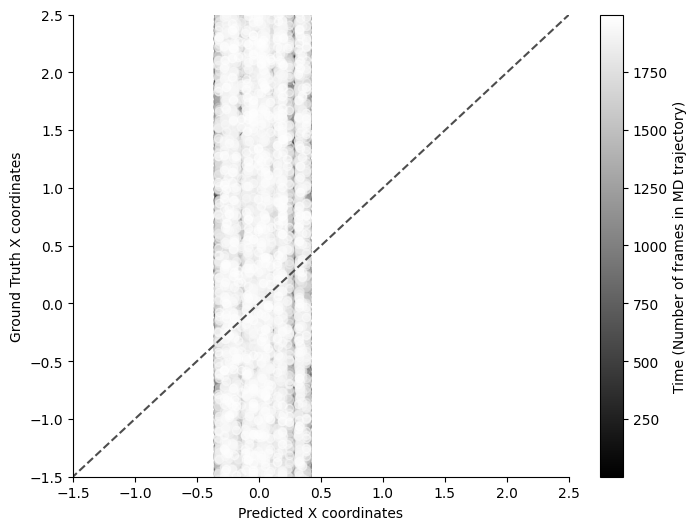

In [25]:


# Assuming ground truth and predicted X coordinates are stored in variables gt_x_coords and pred_x_coords respectively

plt.figure(figsize=(8, 6))

# Define colormap
cmap = plt.cm.gray(np.linspace(0, 1, 1997))

# Loop over all graphs
for i in range(1997):
    # Plot each graph with a different grayscale color
    plt.scatter(x=coords[i, :, 0], y=test_targets[i, :, 0], color=cmap[i], alpha=0.5, label=f'Graph {i+1}')

# Plot diagonal line for reference
plt.plot([-10, 20], [-10, 20], ls="--", c=".3")

# Set plot limits and labels
plt.xlim(-1.5, 2.5)
plt.ylim(-1.5, 2.5)
plt.xlabel("Predicted X coordinates")
plt.ylabel("Ground Truth X coordinates")
# plt.title("Comparison of Ground Truth and Predicted X Coordinates")

# Remove top and right spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Add legend
# plt.legend()
# Add colorbar
sm = plt.cm.ScalarMappable(cmap=plt.cm.gray, norm=plt.Normalize(vmin=1, vmax=1997))
sm.set_array([])
plt.colorbar(sm, label='Time (Number of frames in MD trajectory)')

# Show plot
plt.show()


/tmp/ipykernel_2635676/2051250930.py:35: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm, label='Time (Number of frames in MD trajectory)')


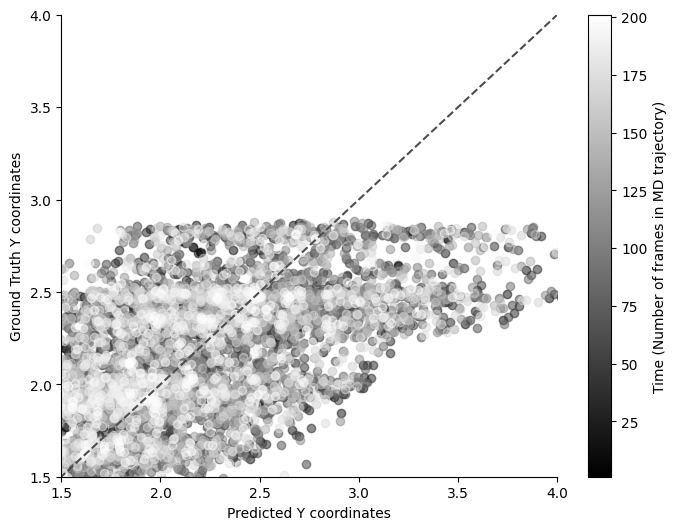

In [17]:


# Assuming ground truth and predicted X coordinates are stored in variables gt_x_coords and pred_x_coords respectively

plt.figure(figsize=(8, 6))

# Define colormap
cmap = plt.cm.gray(np.linspace(0, 1, 201))

# Loop over all graphs
for i in range(201):
    # Plot each graph with a different grayscale color
    plt.scatter(x=coords[i, :, 1], y=test_targets[i, :, 1], color=cmap[i], alpha=0.5, label=f'Graph {i+1}')

# Plot diagonal line for reference
plt.plot([-10, 20], [-10, 20], ls="--", c=".3")

# Set plot limits and labels
plt.xlim(1.5, 4)
plt.ylim(1.5, 4)
plt.xlabel("Predicted Y coordinates")
plt.ylabel("Ground Truth Y coordinates")
# plt.title("Comparison of Ground Truth and Predicted X Coordinates")

# Remove top and right spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Add legend
# plt.legend()
# Add colorbar
sm = plt.cm.ScalarMappable(cmap=plt.cm.gray, norm=plt.Normalize(vmin=1, vmax=201))
sm.set_array([])
plt.colorbar(sm, label='Time (Number of frames in MD trajectory)')

# Show plot
plt.show()


/tmp/ipykernel_2635676/2418739173.py:35: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm, label='Time (Number of frames in MD trajectory)')


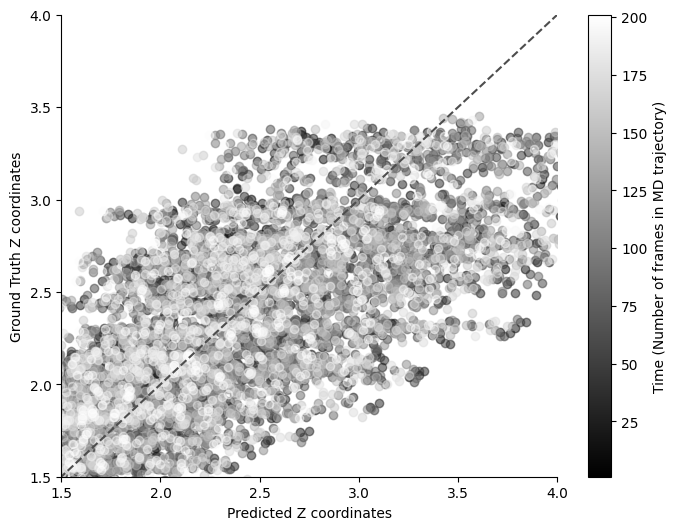

In [18]:


# Assuming ground truth and predicted X coordinates are stored in variables gt_x_coords and pred_x_coords respectively

plt.figure(figsize=(8, 6))

# Define colormap
cmap = plt.cm.gray(np.linspace(0, 1, 201))

# Loop over all graphs
for i in range(201):
    # Plot each graph with a different grayscale color
    plt.scatter(x=coords[i, :, 2], y=test_targets[i, :, 2], color=cmap[i], alpha=0.5, label=f'Graph {i+1}')

# Plot diagonal line for reference
plt.plot([-10, 20], [-10, 20], ls="--", c=".3")

# Set plot limits and labels
plt.xlim(1.5, 4)
plt.ylim(1.5, 4)
plt.xlabel("Predicted Z coordinates")
plt.ylabel("Ground Truth Z coordinates")
# plt.title("Comparison of Ground Truth and Predicted X Coordinates")

# Remove top and right spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Add legend
# plt.legend()
# Add colorbar
sm = plt.cm.ScalarMappable(cmap=plt.cm.gray, norm=plt.Normalize(vmin=1, vmax=201))
sm.set_array([])
plt.colorbar(sm, label='Time (Number of frames in MD trajectory)')

# Show plot
plt.show()


In [3]:
import numpy as np

m = [0.92643731, 0.94558806, 0.94772572]
s = [0.11067783, 0.08539494, 0.08090701]

mean = np.mean(m)
std_dev = np.mean(s)

result = f"Mean: {mean:.6f} +/- {std_dev:.6f}"
print(result)

Mean: 0.939917 +/- 0.092327


# Attention Maps

In [8]:
with open('../attention_maps_gb3.pkl', 'rb') as file:
    # Load the data from the pickle file
    row_attn = pk.load(file)

In [7]:
row_attn[15][0].shape

torch.Size([41, 1, 55, 55])

torch.Size([1600, 56, 56])
tensor([8.4106e-06, 7.6835e-06, 5.2488e-06, 2.1410e-06, 1.6475e-06, 1.8787e-06,
        2.4875e-06, 1.7295e-06, 7.6100e-07, 7.7924e-07, 8.1696e-07, 5.4727e-07,
        6.0870e-07, 6.0639e-07, 1.8012e-06, 2.1711e-06, 2.6672e-06, 2.5962e-06,
        1.6185e-06, 1.5177e-06, 1.1845e-06, 8.9547e-07, 1.1447e-06, 1.8149e-06,
        1.9002e-06, 1.7624e-06, 1.6695e-06, 7.8867e-07, 1.0209e-06, 1.7744e-06,
        1.9988e-06, 6.3730e-06, 1.1674e-05, 1.4351e-05, 2.3459e-05, 2.4851e-05,
        3.3606e-05, 1.6886e-05, 2.7357e-05, 2.3008e-05, 1.9799e-05, 6.1370e-05,
        1.3089e-04, 1.5174e-04, 1.4140e-04, 6.4902e-05, 7.9035e-05, 3.2737e-04,
        3.8736e-03, 4.1322e-02, 3.7469e-01, 5.5369e-01, 9.4725e-02, 9.5961e-03,
        1.4794e-03, 8.9307e-04])
Max vector saved to max_vector_gb3.csv


<Axes: >

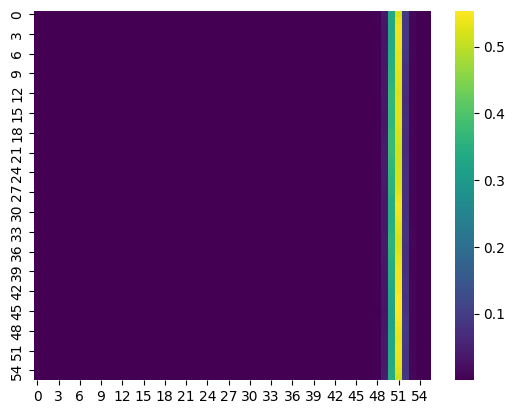

In [9]:
import pickle as pk
import seaborn as sns
import torch
import pickle as pk
import seaborn as sns

# Load the data from the pickle file
with open('../attention_maps_gb3.pkl', 'rb') as file:
    row_attn = pk.load(file)

row_attn_tensor = row_attn[0][0]
# Get the shape of the attention maps
row_attn_shape = row_attn_tensor.shape

# Create an empty tensor
result_tensor = torch.empty((0,) + row_attn_shape[1:], dtype=row_attn_tensor.dtype)

# Iterate over the range and add row_attn[i][0] to the result_tensor
for i in range(16):
    result_tensor = torch.cat((result_tensor, row_attn[i][0]))

result_tensor = result_tensor.squeeze(1)
# Print the result_tensor
print(result_tensor.shape)

result_tensor = torch.mean(result_tensor, dim=0)

max_vector = torch.max(result_tensor, dim=0)[0]
print(max_vector)
import csv

# Define the file path
file_path = 'max_vector_gb3.csv'

# Define the data to be saved
data = [(i+1, score.item()) for i, score in enumerate(max_vector)]

# Save the data to the CSV file
with open(file_path, 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['Residue Number', 'Attention Score'])
    writer.writerows(data)

print(f"Max vector saved to {file_path}")
# Calculate the mean attention map
# attention_maps = [i[0].mean(dim=0) for i in result_tensor]

# Plot the first attention map
sns.heatmap(result_tensor, cmap='viridis')


# Dirchlet Energy of Graph from Latent Representations

In [8]:
import graphtools as gt
import numpy as np
from pygsp import graphs
import pickle as pk
# Load the latent representation file
latent_file = '../latent_embeddingsgb3.pkl'
with open(latent_file, 'rb') as file:
    z_rep = pk.load(file)

with open('../times_gb3.pkl', 'rb') as file: 
    # Load the data from the pickle file
    times = pk.load(file)

print(len(times))
# Convert the latent representation to a numpy array
z_rep = np.concatenate(z_rep, axis=0)

# Define the number of nearest neighbors (k) for the kNN graph
k = 10

# Compute the kNN graph
knn_graph = graphs.NNGraph(z_rep, k=k, rescale=False)

# Compute the Laplacian matrix
laplacian_matrix = knn_graph.L
# Compute the Dirichlet energy
feature_vector = times  # Example feature vector (should this be time?)
dirichlet_energy = np.dot(feature_vector, laplacian_matrix.dot(feature_vector))

# Normalize by dividing by x^T x
feature_norm = np.dot(feature_vector.T, feature_vector)
dirichlet_energy_normalized = dirichlet_energy / feature_norm

print("Dirichlet Energy (Normalized):", dirichlet_energy_normalized)

# print("Dirichlet Energy:", dirichlet_energy)

1001
Dirichlet Energy (Normalized): 1.721773210434536e-16
